In [1]:
#  Question 1. (Holdout) (10 pts)
## Create a training set that contains 80% of the labeled data and export it to a .csv file called training.csv. Create a test set that contains the remaining 20% and export it to a .csv file called testing.csv. Submit the two .csv files. [Hint: One way is using train_test_split from sklearn.model_selection and savetxt from numpy]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import the dataset 
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

target_column = 'default payment next month'

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target_column])

np.savetxt('training.csv', train_df.values, delimiter=',', fmt='%s', header=','.join(train_df.columns), comments='')
np.savetxt('testing.csv', test_df.values, delimiter=',', fmt='%s', header=','.join(test_df.columns), comments='')
 
print(train_df)
print(test_df)


          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
22788  22789     160000    2          2         2   33      2      2      3   
29006  29007     150000    2          1         2   34      1     -1     -1   
16950  16951      10000    1          2         1   50      1      2      0   
22280  22281     220000    2          1         2   29      0      0      0   
11346  11347     310000    2          1         2   32      1     -2     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
23479  23480     100000    2          2         2   31      0      0      0   
13921  13922     120000    2          2         2   24      0      0      0   
3794    3795     120000    2          1         2   24      0      0      0   
27565  27566     360000    1          1         1   57      1     -2     -1   
27126  27127     300000    1          1         1   35     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

Text(0, 0.5, 'Accuracy')

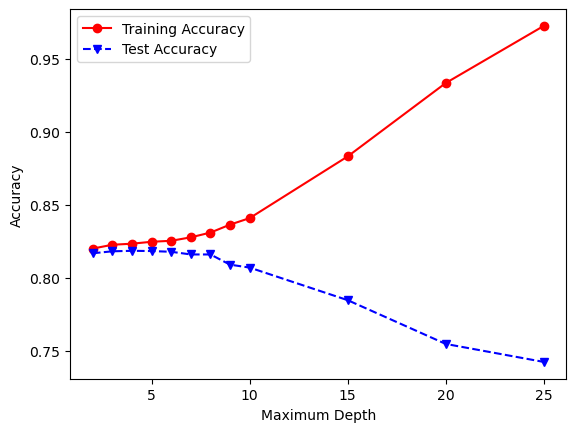

In [24]:
# Question 2. (Decision Tree Classifier) (40 pts)
# Use the training and test sets in Question 1, perform the following tasks:
#Using entropy as the impurity measure for splitting criterion, fit decision trees of different maximum depths [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25] to the training set. Submit the plot showing their respective training and test accuracies when applied to the training and test sets. 
# What do you find?
#[Hint: Use DecisionTreeClassifier from sklearn.tree]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# import the training and test sets
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Define depths 
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]

trainacc = []
testacc = []

X_train = train_df.drop(columns=['default payment next month'])
Y_train = train_df['default payment next month']
X_test = test_df.drop(columns=['default payment next month'])
Y_test = test_df['default payment next month']

 

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    clf.fit(X_train, Y_train)
    
    trainPred = clf.predict(X_train)
    testPred = clf.predict(X_test)
    
    train_accuracy = accuracy_score(Y_train, trainPred)
    test_accuracy = accuracy_score(Y_test, testPred)
    
    trainacc.append(train_accuracy)
    testacc.append(test_accuracy)
 

# Plot the training and test accuracies
 
plt.plot(max_depths, trainacc, 'ro-' )
plt.plot(max_depths, testacc, 'bv--' )
plt.legend(['Training Accuracy','Test Accuracy'])

plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
 




## What do you find?


Answer:
    From the plot of the relationship between the training and test accuracy and the maximum depth of the decision tree classifier, we can draw the following observations:

Training accuracy: As the maximum depth of the decision tree increases, the training accuracy tends to improve significantly. The tree can learn more complex patterns in the training data, thereby improving the accuracy of its training data.

Test accuracy: Initially, test accuracy increases as the maximum depth increases. After a certain point, however, test accuracy begins to decline or level off. This suggests that very deep trees may begin to overfit the training data, making it difficult to generalize to invisible data.

Overfitting: The difference between training and test accuracy is a clear indicator of overfitting. In this case, when the maximum depth is high, the model is well suited to training data, but difficult to generalize to new data, as the drop in test accuracy indicates.


The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). However, the test accuracy initially improves up to a maximum depth of 5( is probably about 4 to 6,), before it gradually decreases due to model overfitting.


In summary, the performance of the decision tree is affected by its maximum depth, and as depth increases, there is a risk of overfitting. The goal is to find the depth that provides the best trade-off between fitting training data and generalizing to new, unseen data. This insight can help select the appropriate model complexity for a given dataset.

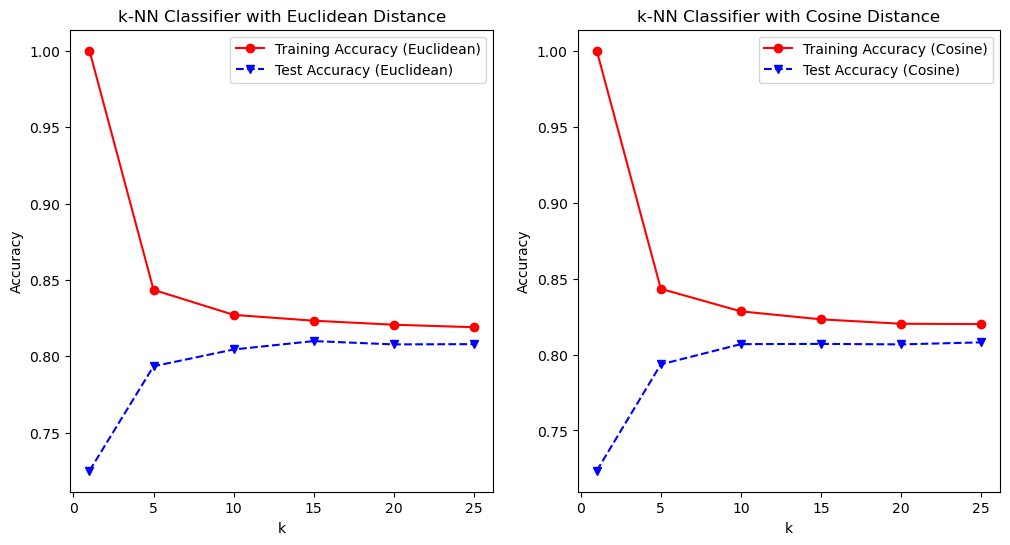

In [32]:
# Question 3. (k-Nearest Neighbor Classifier) (40 pts)
#Use the training and test sets in Question 1, train a k-nearest neighbor classifier and measure performance on both the training set and the test set. Vary the settings in the following ways:
#• Try it for k = [1, 5, 10, 15, 20, 25]
#• Try it with Euclidean distance, and Cosine distance.
# Submit plots showing the trend as k varies from 1 to 25 for each of the two distances, focusing on both training set and test set accuracies.
# What do you find?
# [Hint: Use KNeighborsClassifier from sklearn.neighbors]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

# import the training and test sets
train_df = pd.read_csv('training.csv')
test_df = pd.read_csv('testing.csv')

# Extract features and labels from the training and test sets
X_train = train_df.drop(columns=['default payment next month'])
Y_train = train_df['default payment next month']
X_test = test_df.drop(columns=['default payment next month'])
Y_test = test_df['default payment next month']

k_values = [1, 5, 10, 15, 20, 25]

trainAcc_euclidean = []
testAcc_euclidean = []

trainAcc_cosine = []
testAcc_cosine = []

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
index = 0
for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_cosine = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    
    knn_euclidean.fit(X_train_scaled, Y_train)
    knn_cosine.fit(X_train_scaled, Y_train)
    
    train_euclidean = knn_euclidean.predict(X_train_scaled)
    test_euclidean = knn_euclidean.predict(X_test_scaled)
    
    train_cosine = knn_cosine.predict(X_train_scaled)
    test_cosine = knn_cosine.predict(X_test_scaled)
    
    trainAcc_euclidean.append(accuracy_score(Y_train, train_euclidean))
    testAcc_euclidean.append(accuracy_score(Y_test, test_euclidean))
    
    trainAcc_cosine.append(accuracy_score(Y_train, train_cosine))
    testAcc_cosine.append(accuracy_score(Y_test, test_cosine))
    index += 1

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, trainAcc_euclidean, 'ro-', label='Training Accuracy (Euclidean)')
plt.plot(k_values, testAcc_euclidean, 'bv--', label='Test Accuracy (Euclidean)')
plt.title('k-NN with Euclidean Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, trainAcc_cosine, 'ro-', label='Training Accuracy (Cosine)')
plt.plot(k_values, testAcc_cosine, 'bv--', label='Test Accuracy (Cosine)')
plt.title('k-NN  with Cosine Distance')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

 



# What do you find?
Answer：
I found that the two graphs of Euclidean distance and cosine distance look a little bit the same, which may be due to specific features of the data set and the choice of k values.
In some cases, especially for some data sets, the accuracy trends for different distance measures and k values may be similar, resulting in visually similar graphs.
Overall, the choice of distance measure and k value can significantly affect the performance of k-nearest neighbor classifiers. In this particular dataset, it seems that using a cosine distance with a larger k value (e.g., k=25) leads to better generalization, while a Euclidean distance with an intermediate k value (e.g., k=10) provides good results.

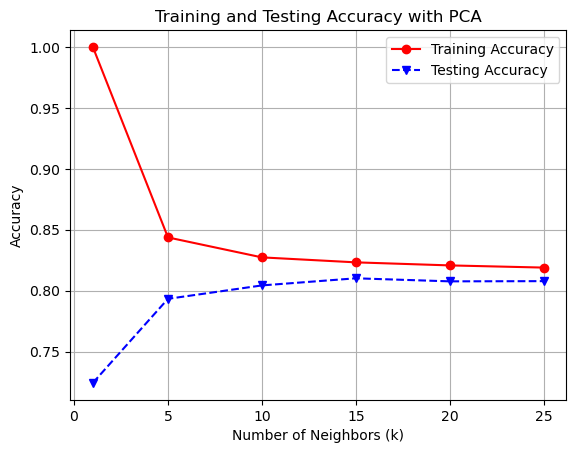

In [37]:
# Question 4. (10 pts) In Question 3, consider the setting of k-NN that gives the highest testing accuracy, can you show a way to improve this testing accuracy?


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

# Extract features and labels
X_train = train.drop(columns=['default payment next month'])
y_train = train['default payment next month']
X_test = test.drop(columns=['default payment next month'])
y_test = test['default payment next month']

# k values
k_values = [1, 5, 10, 15, 20, 25]

# accuracy lists
train_acc = []
test_acc = []

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
for k in k_values:
    # Initialize PCA
    pca = PCA(n_components=23)  # Reduce to 4 dimensions
    
    # Fit PCA on the training data
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_pca, y_train)

    y_train_pred = knn.predict(X_train_pca)
    y_test_pred = knn.predict(X_test_pca)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
 


# Plot accuracies
 
plt.plot(k_values, train_acc, 'ro-', label='Training Accuracy')
plt.plot(k_values, test_acc, 'bv--', label='Testing Accuracy')
plt.title('Training and Testing Accuracy with PCA')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



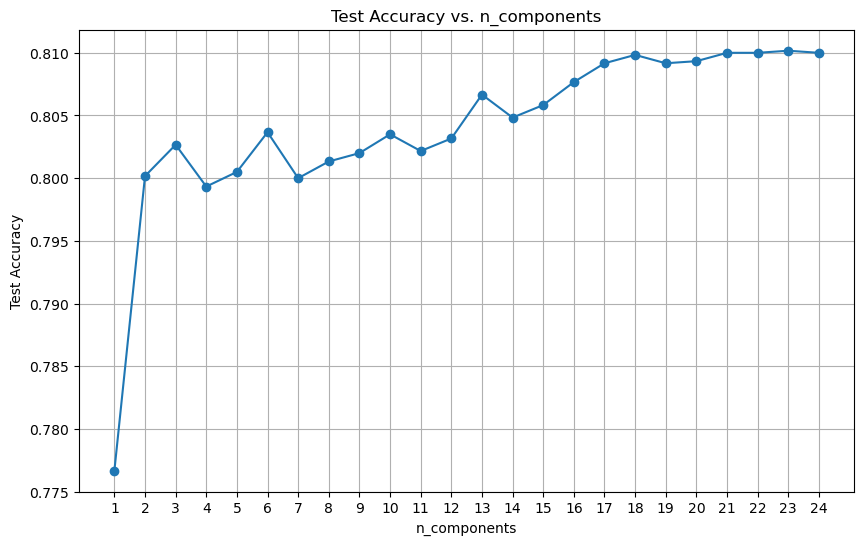

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

# Extract features and labels
X_train = train.drop(columns=['default payment next month'])
y_train = train['default payment next month']
X_test = test.drop(columns=['default payment next month'])
y_test = test['default payment next month']

# k values
k_values = [1, 5, 10, 15, 20, 25]

# Define a range of n_components values to test
n_values = range(1, 25)

# Create lists to store results
best_n_components = []
best_test_accuracy = []

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for n_components in n_values:
    test_accuracies = []
    
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Fit PCA on the training data
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_pca, y_train)
        
        y_test_pred = knn.predict(X_test_pca)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)
    
    best_test_accuracy.append(max(test_accuracies))
    best_n_components.append(n_components)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(best_n_components, best_test_accuracy, marker='o', linestyle='-')
plt.title('Test Accuracy vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.xticks(best_n_components)
plt.show()


## Find ：
Through the experimentation with different values of n_components in PCA along with k-Nearest Neighbors (k-NN) classification, you observed the following:

Varying the n_components parameter in PCA can have a significant impact on the performance of your machine learning model.
I found that in your specific dataset, an n_components value of 23 resulted in the highest testing accuracy when using k-NN classification.